# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [84]:
from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import sklearn
from sklearn.metrics import classification_report

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

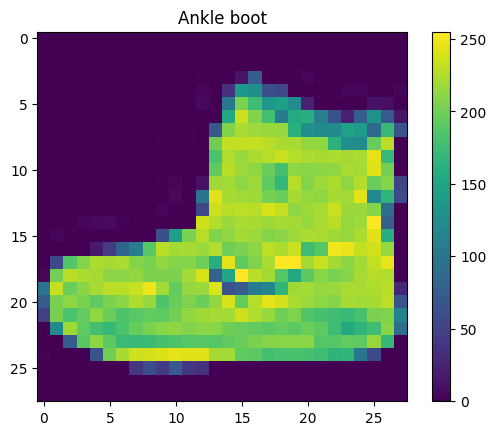

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.title(labels_dict[y_train[0]])
plt.show()


## Предобработка

**Нормализуйте данные X_train и X_test **

In [86]:
X_train = x_train / 255.0
X_test = x_test / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [87]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print("Форма X_train: ", X_train.shape)
print("Форма X_test: ", X_test.shape)

Форма X_train:  (60000, 28, 28, 1)
Форма X_test:  (10000, 28, 28, 1)


**Преобразуйте  y_train и y_test в one_hot представления **

In [88]:
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [89]:
# Создание модели
model = keras.models.Sequential()
model.add(Conv2D(32, (4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               589952    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

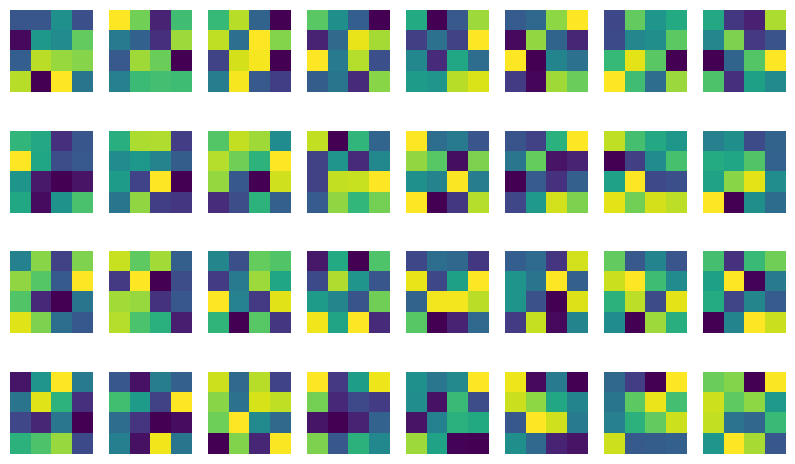

In [91]:
# Получаем веса модели
filters_layer_weights = model.layers[0].get_weights()[0]
     
# Визуализируем фильтры
plt.figure(figsize=(10, 6))
num_filters = filters_layer_weights.shape[3]
for i in range(num_filters):
    plt.subplot(4, 8, i+1)
    plt.imshow(filters_layer_weights[:, :, 0, i])
    plt.axis('off')
plt.show()

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [92]:
# Обучение модели
model.fit(X_train, y_train_one_hot, batch_size=128, epochs=10, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
469/469 [==============================] - 16s 32ms/step - loss: 0.5089 - accuracy: 0.8196 - val_loss: 0.3880 - val_accuracy: 0.8586
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.3269 - accuracy: 0.8826 - val_loss: 0.3303 - val_accuracy: 0.8789
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2796 - accuracy: 0.8982 - val_loss: 0.2842 - val_accuracy: 0.8980
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2486 - accuracy: 0.9088 - val_loss: 0.2788 - val_accuracy: 0.9016
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2247 - accuracy: 0.9179 - val_loss: 0.2696 - val_accuracy: 0.9026
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.2057 - accuracy: 0.9249 - val_loss: 0.2653 - val_accuracy: 0.9039
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1889 - accuracy: 0.9308 - val_loss: 0.2652 - val_accuracy:

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [93]:
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2721 - accuracy: 0.9084
Test loss: 0.27205684781074524
Test accuracy: 0.9083999991416931


In [94]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions, axis=1)
y_test=np.argmax(y_test_one_hot, axis=1)
print(classification_report(y_test,predictions))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.92      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.74      0.75      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

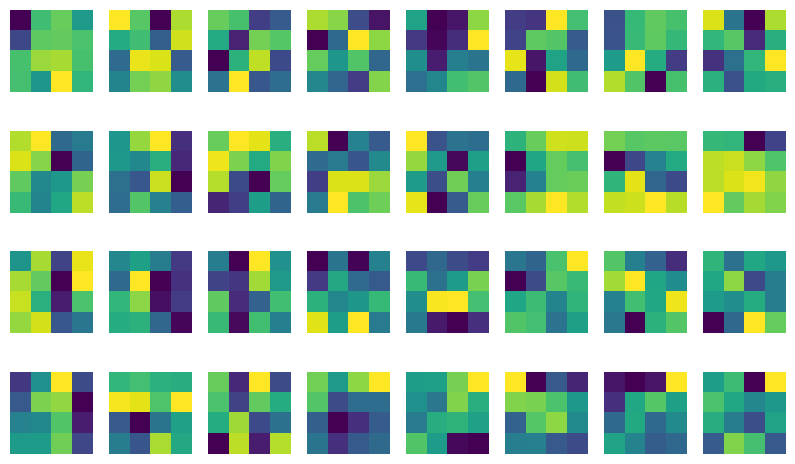

In [95]:
# Получаем веса модели
filters_layer_weights = model.layers[0].get_weights()[0]
     
# Визуализируем фильтры
plt.figure(figsize=(10, 6))
num_filters = filters_layer_weights.shape[3]
for i in range(num_filters):
    plt.subplot(4, 8, i+1)
    plt.imshow(filters_layer_weights[:, :, 0, i])
    plt.axis('off')
plt.show()